    TradingWeek DateStr  PrevClose      Close  CloseChange    Profit  \
504     2020-09  200228  60.066666  44.532665   -25.861267 -2.920001   
506     2020-11  200313  46.898666  36.441334   -22.297717 -0.608612   
507     2020-12  200320  36.441334  28.502001   -21.786615 -0.286653   

     CumulativeProfit  
504         60.293765  
506         60.130480  
507         59.843827  


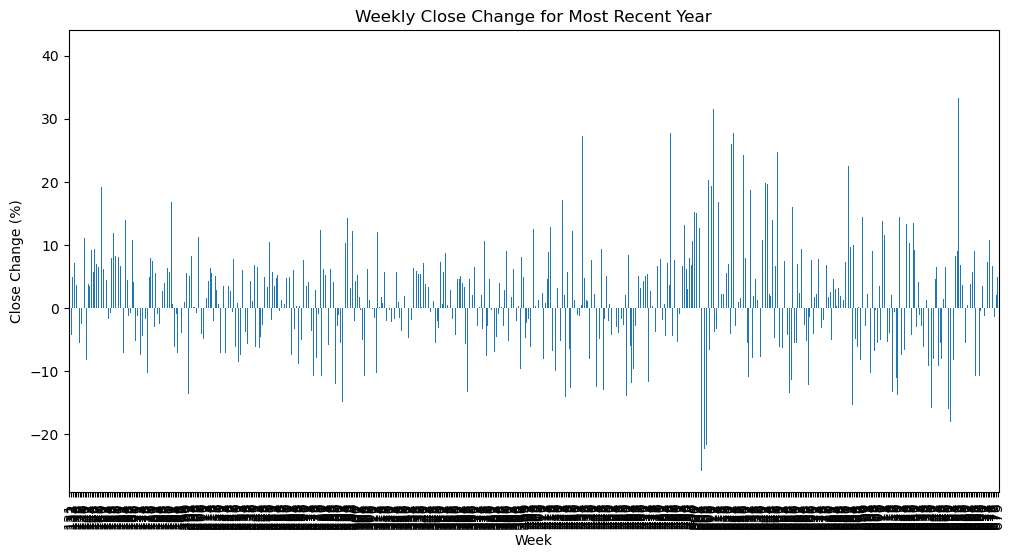

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('data/TSLA.csv')

# Convert date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set date as index
df.set_index('Date', inplace=True)

# Calculate the end of week dates
df['Week'] = df.index.to_series().dt.isocalendar().week
df['Year'] = df.index.to_series().dt.isocalendar().year
df['DateStr'] = df.index.strftime('%y%m%d')
df['TradingWeek'] = df['Year'].astype(str) + '-' + df['Week'].astype(str).apply(lambda x: str(x).zfill(2))

# Filter out the end trading day of each week
weekly_df = df.groupby('TradingWeek').last()

# Calculate the last Friday's close price
weekly_df['PrevClose'] = weekly_df['Close'].shift(1)

# Initialize the profit column
weekly_df['Profit'] = 0.0

# Calculate profit or loss for each week for call options
strike_factor = 1.20
premium = 0.01
for i in range(1, len(weekly_df)):
    prev_close = weekly_df.iloc[i-1]['Close']
    this_close = weekly_df.iloc[i]['Close']
    if this_close <= prev_close * strike_factor:
        profit = prev_close * premium
    else:
        profit = prev_close * premium - (this_close - prev_close * strike_factor)
    weekly_df.iloc[i, weekly_df.columns.get_loc('Profit')] = profit

# Calculate profit or loss for each week for put options
strike_factor = 0.80
for i in range(1, len(weekly_df)):
    prev_close = weekly_df.iloc[i-1]['Close']
    this_close = weekly_df.iloc[i]['Close']
    if this_close >= prev_close * strike_factor:
        profit = prev_close * premium
    else:
        profit = prev_close * premium - (prev_close * strike_factor - this_close)
    weekly_df.iloc[i, weekly_df.columns.get_loc('Profit')] = profit

# Calculate the cumulative profit
weekly_df['CumulativeProfit'] = weekly_df['Profit'].cumsum()

# Calculate the close price change for each week
weekly_df['CloseChange'] = ((weekly_df['Close'] - weekly_df['PrevClose']) / weekly_df['PrevClose']) * 100

# Select only necessary columns
output_df = weekly_df[['DateStr', 'PrevClose', 'Close', 'CloseChange', 'Profit', 'CumulativeProfit']].reset_index()

# Filter rows where the strategy took a loss (Profit < 0)
loss_weeks_df = output_df[output_df['Profit'] < 0]

# Print the loss weeks
print(loss_weeks_df)

# Plot the close change for the most recent year
recent_year_df = output_df[output_df['TradingWeek'] >= '2013-01']
recent_year_df['CloseChange'].plot(kind='bar', figsize=(12,6))
plt.title('Weekly Close Change for Most Recent Year')
plt.xlabel('Week')
plt.ylabel('Close Change (%)')
plt.show()


In [7]:
recent_year_df[recent_year_df['CloseChange'] > 15]


,TradingWeek,DateStr,PrevClose,Close,CloseChange,Profit,CumulativeProfit
149,2013-19,130510,3.636667,5.117333,40.714918,0.036367,2.906813
150,2013-20,130517,5.117333,6.100000,19.202718,0.051173,2.957987
185,2014-03,140117,9.714667,11.334000,16.668950,0.097147,6.249260
191,2014-09,140228,13.973333,16.320667,16.798669,0.139733,6.996180
422,2018-31,180803,19.812000,23.211332,17.157945,0.198120,46.310626
434,2018-43,181026,17.333332,22.059999,27.269235,0.173333,48.668413
486,2019-43,191025,17.129999,21.875334,27.701899,0.171300,58.067680
500,2020-05,200131,37.654667,43.371334,15.181829,0.376547,61.747986
508,2020-13,200327,28.502001,34.290668,20.309686,0.285020,60.128847
510,2020-15,200409,32.000668,38.200001,19.372511,0.320007,60.791760
